# AIT500 - Lab 3

## Objective

In this lab, you will build a data collection, data cleaning, and data transformation pipeline


### Meteor Dataset Description
[Earth Meteorite Landings](https://data.nasa.gov/view/ak9y-cwf9)

### Lego Dataset

[Lego Dataset crafted by Kaggle community](https://www.kaggle.com/datasets/rtatman/lego-database).  This dataset contains the LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database. These files are current as of July 2017. If you need it to be more recent data, you can use Rebrickable’s API which provides up to date data, and additional features.

Schema of Lego dataset showing the relationship between the different `.csv` files.
<img src="lab02_lego_dataset_schema.png">


## Lab Instructions
1. Explore the [NASA Earth Meteorite Landings](https://data.nasa.gov/view/ak9y-cwf9) site
2. Download the NASA meteorite landings data in json format here:
   - https://raw.githubusercontent.com/dora-lee/seneca-ait500-2023-fall/main/labs/nasa_meteorites.json
3. Load data into pandas
4. Data cleaning
   1. remove rows that have zero mass
   2. create a new column called `mass_grams_log` and take np.log10() of the `mass_grams` field
5. Data exploration
   1. use scatter matrix plot to explore relationships between numerical values.  Write some characteristics you observed (at least 2)
   2. create a histogram of `mass_grams`
   3. create a histogram of `mass_grams_log`
   4. play aorund with parameters of `.plot.hist()` how do the two charts compare?  how does it compare to the chart on Nasa's site?

6. Download the [Lego dataset from Kaggle](https://www.kaggle.com/datasets/rtatman/lego-database) and load data into data frames by examining the schema, join the appropriate dataframes together and answer these questions with code:
   - how many parts are in each `part_categories.name` category?
     - hint1: look at how the `part_categories` table is related/connected to other tables that give you quantities
     - hint2: consider using the `merge()` function
   - how many colours are in each `part_categories.name`?  Hint use `colours.name`

      


## Reference Information
- [Earth Meteorite Landings](https://data.nasa.gov/view/ak9y-cwf9)
- [Lego Dataset crafted by Kaggle community](https://www.kaggle.com/datasets/rtatman/lego-database)


In [ ]:
# increase Jupyter cell width

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Setup Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # plotting library
import os
from PIL import Image

import json
import requests

import seaborn as sns
import numpy as np

os.getcwd()

'/content'

# Meteorites Dataset

### Q2 download data

In [ ]:
# your code to download dataset here

In [ ]:
!curl https://raw.githubusercontent.com/dora-lee/seneca-ait500-2023-fall/main/labs/nasa_meteorites.json --output nasa_meteorites.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9798k  100 9798k    0     0  16.0M      0 --:--:-- --:--:-- --:--:-- 16.0M


In [ ]:
!head -c 100 nasa_meteorites.json # show first 100 bytes

[{"name":"Aachen","id":1,"nametype":"Valid","recclass":"L5","mass_grams":21.0,"fall":"Fell","year":1

In [ ]:
# your code here to answer meteorites questions.  use as many cells as needed

### Q3 Create meteorites dataframe

In [ ]:
filename = 'nasa_meteorites.json'
df_meteorites = pd.read_json(filename)
df_meteorites.head(3)

,name,id,nametype,recclass,mass_grams,fall,year,reclat,reclong,GeoLocation,States,Counties
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN


In [ ]:
df_meteorites.shape

(45716, 12)

### Q4.1 remove rows with zero mass

In [ ]:
df_meteorites_have_mass = df_meteorites[df_meteorites['mass_grams']>0].copy()
df_meteorites_have_mass.shape ## rows were removed!

(45566, 12)

In [ ]:
# show descriptive statistics
df_meteorites_have_mass.describe()

,id,mass_grams,year,reclat,reclong,States,Counties
count,45566.000000,4.556600e+04,45291.000000,38263.000000,38263.000000,1652.000000,1652.000000
mean,26883.419523,1.328362e+04,1991.971893,-39.397574,61.207401,17.317191,1353.149516
std,16855.149915,5.751087e+05,23.925433,46.197353,80.683448,10.414714,994.616804
min,1.000000,1.000000e-02,860.000000,-87.366670,-165.433330,1.000000,5.000000
25%,12700.250000,7.200000e+00,1987.000000,-76.716670,0.000000,9.000000,481.500000
50%,24266.500000,3.269500e+01,1998.000000,-71.500000,35.666670,15.000000,1195.000000
75%,40609.750000,2.028000e+02,2003.000000,0.000000,157.166670,23.000000,2114.250000
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000,51.000000,3210.000000


### Q4.2  create a new column called `mass_grams_log` and take np.log10() of the `mass_grams` field

We want to take the logarithm of `mass_grams` because of the wide range of values this column has.

- Min() mass is 0.01 grams
- Max() mass is 60,000,000 grams

After taking the logarithm, `mass_grams_log` now has a smaller range between -2 and 7.7

In [ ]:
df_meteorites_have_mass['mass_grams_log'] = np.log10(df_meteorites_have_mass['mass_grams'])
df_meteorites_have_mass.head(3)

,name,id,nametype,recclass,mass_grams,fall,year,reclat,reclong,GeoLocation,States,Counties,mass_grams_log
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN,1.322219
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN,2.857332
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN,5.029384


In [ ]:
df_meteorites_have_mass.describe()

,id,mass_grams,year,reclat,reclong,States,Counties,mass_grams_log
count,45566.000000,4.556600e+04,45291.000000,38263.000000,38263.000000,1652.000000,1652.000000,45566.000000
mean,26883.419523,1.328362e+04,1991.971893,-39.397574,61.207401,17.317191,1353.149516,1.635056
std,16855.149915,5.751087e+05,23.925433,46.197353,80.683448,10.414714,994.616804,1.093510
min,1.000000,1.000000e-02,860.000000,-87.366670,-165.433330,1.000000,5.000000,-2.000000
25%,12700.250000,7.200000e+00,1987.000000,-76.716670,0.000000,9.000000,481.500000,0.857332
50%,24266.500000,3.269500e+01,1998.000000,-71.500000,35.666670,15.000000,1195.000000,1.514481
75%,40609.750000,2.028000e+02,2003.000000,0.000000,157.166670,23.000000,2114.250000,2.307068
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000,51.000000,3210.000000,7.778151


### Q5.1 Data exploration - use scatter matrix plot to explore relationships between numerical values.  Write some characteristics you observed (at least 2)


<ipython-input-95-9ffdbb5a8d87>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _plot = scatter_matrix(df_meteorites_have_mass, alpha=0.2, figsize=(6, 6), diagonal="kde", ax=ax); # pass axis for use by scatter_matrix()


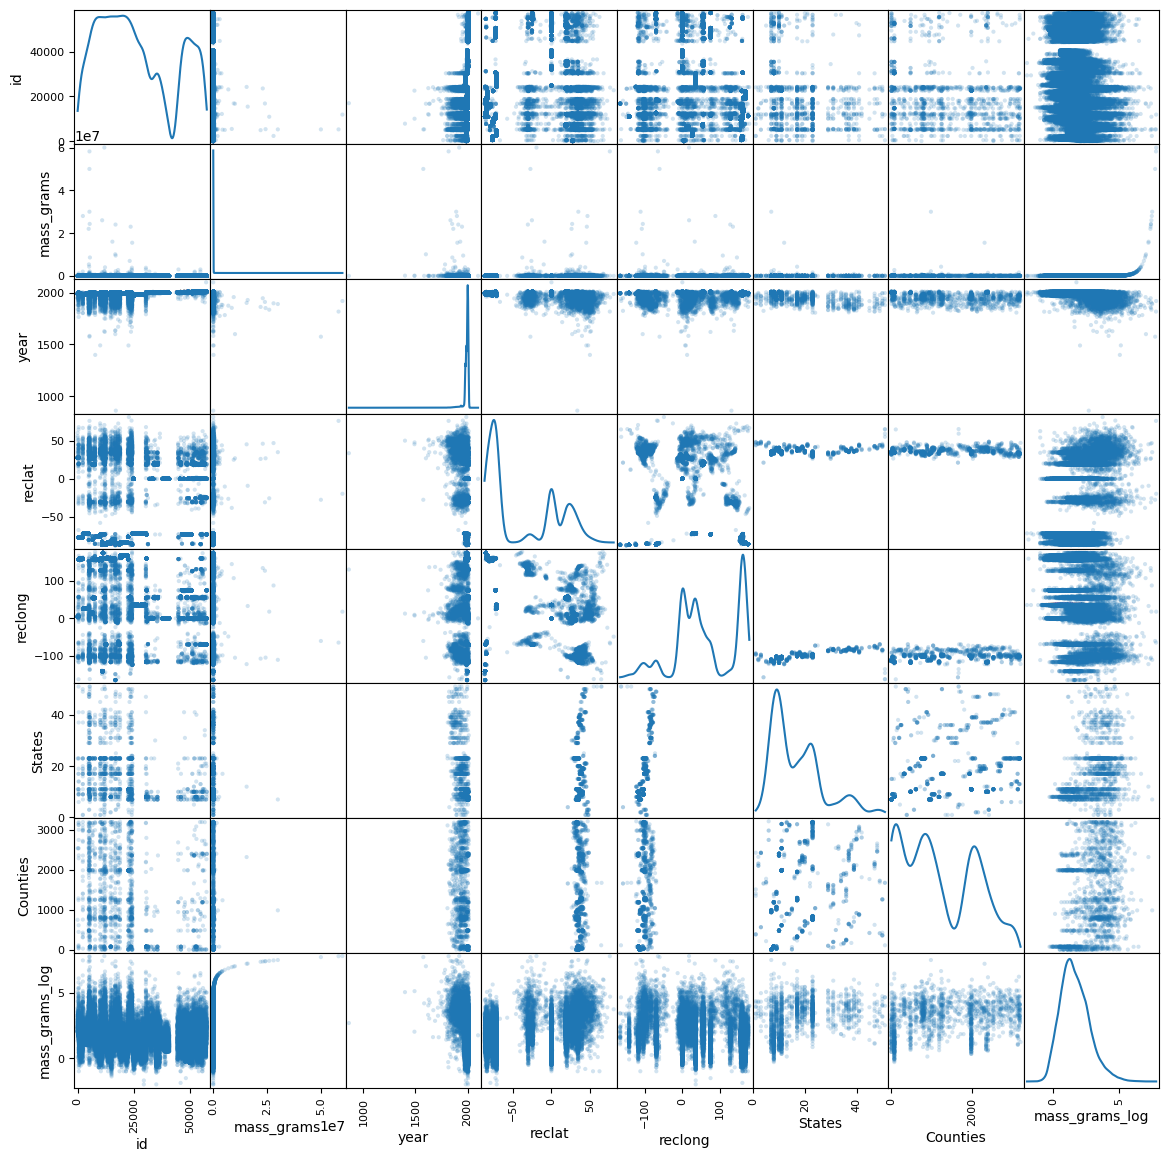

In [ ]:
from pandas.plotting import scatter_matrix
fig = plt.figure(figsize=(14,14)) # change size of figure
ax = fig.add_subplot(2, 1, 1)
_plot = scatter_matrix(df_meteorites_have_mass, alpha=0.2, figsize=(6, 6), diagonal="kde", ax=ax); # pass axis for use by scatter_matrix()




### Q5.2 Data exploration - create a histogram of `mass_grams`


<Axes: ylabel='Frequency'>

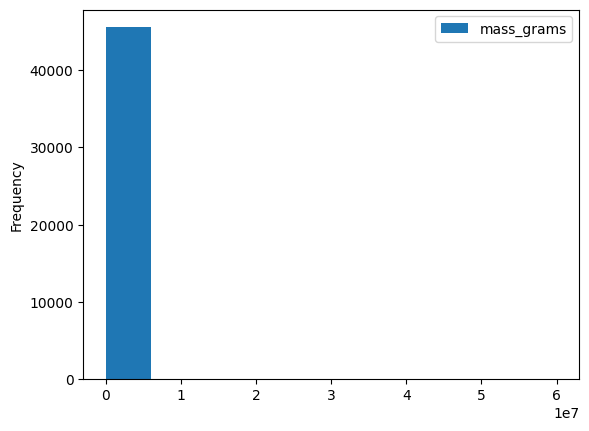

In [ ]:
df_meteorites_have_mass.plot.hist(column=['mass_grams']) # use default settings

<Axes: ylabel='Frequency'>

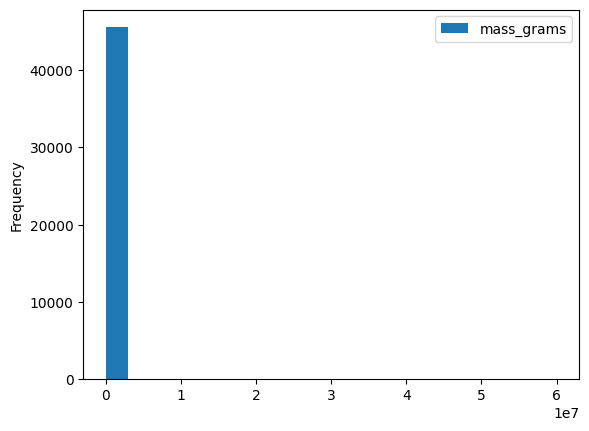

In [ ]:
# use more bins in histogram to see if we can spread out concentration in single column
# --> no because the range of values in mass_grams is too large to display on a linear x-axis
df_meteorites_have_mass.plot.hist(column=['mass_grams'], bins=20)

### Q5.3 Data exploration - create a histogram of `mass_grams_log`


In [ ]:
df_meteorites_have_mass.head(2)

,name,id,nametype,recclass,mass_grams,fall,year,reclat,reclong,GeoLocation,States,Counties,mass_grams_log
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN,1.322219
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN,2.857332


<Axes: ylabel='Frequency'>

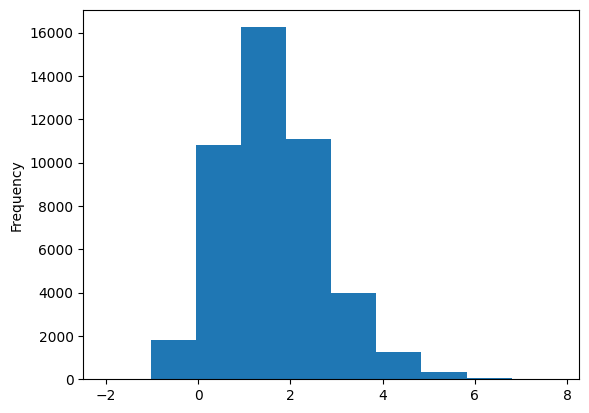

In [ ]:
df_meteorites_have_mass['mass_grams_log'].plot.hist() # use default settings

### Q5.4 Data exploration - play aorund with parameters of `.plot.hist()` how do the two charts compare?  how does it compare to the chart on Nasa's site?

Answer:

`mass_grams` has values that span a very large range (from 0.01grams to 6e7 grams) and the majority of the meteorites are less than 100grams.  When using 20 evenly spaced linear bins, each bin will be `(6e7-0.01)/20=3e6` (ie each bin is in increments of 3million grams).  The majority of meteorites will fall into the first bin and a handful of large meteorites will fall into subsequent bins.  This example shows the impact of a few large outliers affecting data visualization.  

Taking the logarithm of `mass_grams` lets you clearly see both very large and very small values on the same graph.  With `mass_grams_log`, you are plotting the exponent of `mass_grams` on a linear scale.  With 20 bins, each bin will be increments of `(7.7-(-2))/20 = 0.485` preventing concentration in one bin

In summary, it is useful to take the logarithm of a field before manipulation or visualization if the data has both extremely small and extremely large values.

<Axes: ylabel='Frequency'>

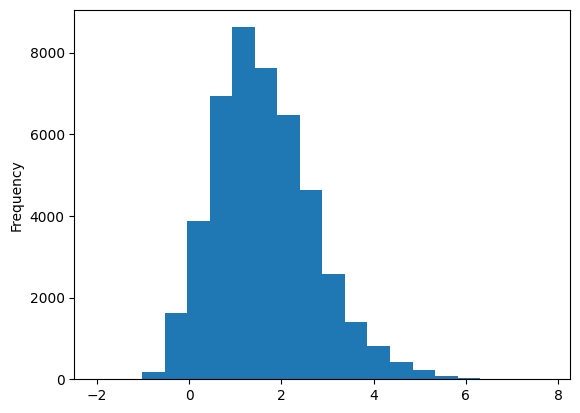

In [ ]:
df_meteorites_have_mass['mass_grams_log'].plot.hist(bins=20) # change number of bins - shape doesn't quite match Nasa's mass-frequency plot

(0.0, 8.0)

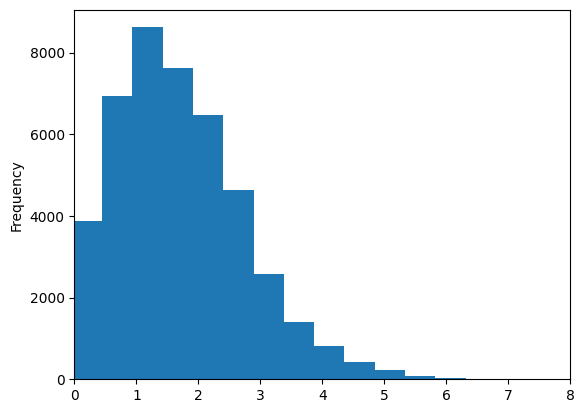

In [ ]:
df_meteorites_have_mass['mass_grams_log'].plot.hist(bins=20) # change the x-axis to match Nasa --> close!
plt.xlim(0, 8)

#### Pandas plot functions does not give us the control needed to recreate the Nasa plot from the same data.

Use `hist()` directly from [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

This chart is similar and not smoothed out

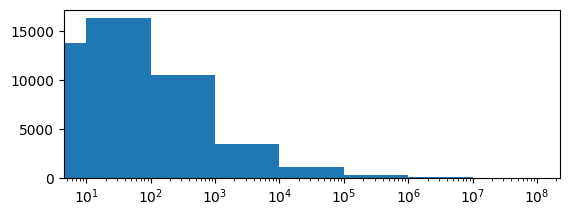

In [ ]:
histogram_bins_matching_nasa = [0, 10, 100, 1000, 10000, 100000, 1e6, 1e7,1e8]
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
_plot = ax.hist(df_meteorites_have_mass['mass_grams'], bins= histogram_bins_matching_nasa)
ax.set_xscale('log')

### Try with pandas kernel density estimation `kde()` to approximate the Nasa chart

Not quite matching

(1, 100000000.0)

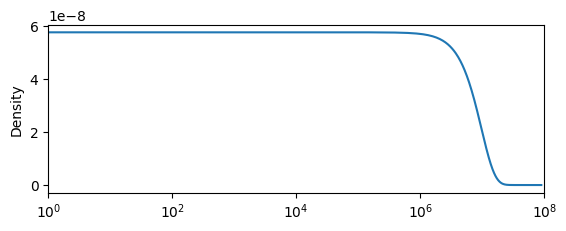

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
df_meteorites_have_mass['mass_grams'].plot.kde(bw_method=12, ind=1000, ax=ax)
ax.set_xscale('log')
plt.xlim(1, 1e8)

# Lego data

Download the [Lego dataset from Kaggle](https://www.kaggle.com/datasets/rtatman/lego-database) and load data into data frames by examining the schema, join the appropriate dataframes together and answer these questions with code:
   - how many parts are in each `part_categories.name` category?
     - hint1: look at how the `part_categories` table is related/connected to other tables that give you quantities
     - hint2: consider using the `merge()` function
   - how many colours are in each `part_categories.name`?  Hint use `colours.name`


In [ ]:
# your code here to answer lego data questions.  use as many cells as needed

In [ ]:
# this cell is for using Colab - mount google drive and copy API key file into ~/.kaggle/kaggle.json
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)

!mkdir ~/.kaggle
!cp /content/notebooks/API_Keys/kaggle.json ~/.kaggle/
!ls -al ~/.kaggle/

Mounted at /content/mnt
total 16
drwxr-xr-x 2 root root 4096 Oct  3 18:51 .
drwx------ 1 root root 4096 Oct  3 18:51 ..
-rw------- 1 root root   63 Oct  3 18:51 kaggle.json


In [ ]:
# if running from Raspberry Pi separately copy your Kaggle API key (kaggle.json) to ~/.kaggle/kaggle.json

# check that API key exists
!ls -al ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Oct  3 18:51 .
drwx------ 1 root root 4096 Oct  3 18:51 ..
-rw------- 1 root root   63 Oct  3 18:51 kaggle.json


In [ ]:
!sudo pip install kaggle
# download kaggle.json key into ~/.kaggle/kaggle.json
!mkdir lego-database
!cd lego-database
!kaggle datasets download rtatman/lego-database
!unzip lego-database

 68% 2.00M/2.94M [00:00<00:00, 2.76MB/s]
100% 2.94M/2.94M [00:00<00:00, 3.28MB/s]
Archive:  lego-database.zip
  inflating: colors.csv              
  inflating: downloads_schema.png    
  inflating: inventories.csv         
  inflating: inventory_parts.csv     
  inflating: inventory_sets.csv      
  inflating: part_categories.csv     
  inflating: parts.csv               
  inflating: sets.csv                
  inflating: themes.csv              


#### Load csv's into dataframes

In [ ]:
df_colors = pd.read_csv('colors.csv')
df_parts = pd.read_csv('parts.csv')
df_themes = pd.read_csv('themes.csv')
df_inventory_parts = pd.read_csv('inventory_parts.csv')
df_inventory_sets = pd.read_csv('inventory_sets.csv')
df_part_categories = pd.read_csv('part_categories.csv')
df_sets = pd.read_csv('sets.csv')
df_inventories = pd.read_csv('inventories.csv')

### Q6.1 how many parts are in each part_categories.name category?

The question is asking you to aggregate total number of parts by the category each part belongs to.  From the schema and table relationship diagram we can determine which tables will be most useful for this task

We will need:
1. category information from `part_categories` table
2. quantity information from `inventory_parts` table
3. to use `parts` table to join the `part_categories` to `inventory_parts`
  - the column `part_categories.id` represent the same field as `parts.part_cat_id` and can be used to join the two tables
  - the column `parts.part_num` represent the same field as `inventory_parts.part_num` and can be used to join the two tables

### Look at table columns to help visual relationship

In [ ]:
df_part_categories.head(3)

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped


In [ ]:
df_parts.head(3)

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1


In [ ]:
df_inventory_parts.head(3)

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f


In [ ]:
df_part_categories_parts = pd.merge(df_part_categories, df_parts, left_on='id', right_on='part_cat_id')
df_part_categories_parts.head(2)

,id,name_x,part_num,name_y,part_cat_id
0,1,Baseplates,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
1,1,Baseplates,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1


In [ ]:
df_part_categories_parts_inv_parts = pd.merge(df_part_categories_parts, df_inventory_parts, left_on='part_num', right_on='part_num')
df_part_categories_parts_inv_parts.head(3)

,id,name_x,part_num,name_y,part_cat_id,inventory_id,color_id,quantity,is_spare
0,1,Baseplates,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,1973,2,1,f
1,1,Baseplates,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,1973,2,1,f
2,1,Baseplates,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,1973,2,1,f


### Answering Question 6.1

In [ ]:
# show part categories with the most quantity
df_part_categories_parts_inv_parts[['name_x', 'quantity']].groupby('name_x').sum().sort_values('quantity', ascending=False).head(10)

,quantity
name_x,
Bricks,321105
Plates,301337
Bricks Sloped,127042
Technic Pins,106187
Plates Special,102119
Tiles,89252
Plates Round and Dishes,77878
Minifig Accessories,49951
Bricks Special,49927


### Q6.2 how many colours are in each `part_categories.name`? Hint use `colours.name`

This question asks us to aggregate quantities by both the category of each part with its different colours

We will need to join the `colors` table with from Q6.1 `df_part_categories_parts_inv_parts`.  

The common field between the tables is `inventory_parts.color_id` with `colors.id`

In [ ]:
df_part_categories_parts_inv_parts_color = pd.merge(df_part_categories_parts_inv_parts, df_colors, left_on='color_id', right_on='id')
df_part_categories_parts_inv_parts_color.head(4)

,id_x,name_x,part_num,name_y,part_cat_id,inventory_id,color_id,quantity,is_spare,id_y,name,rgb,is_trans
0,1,Baseplates,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,1973,2,1,f,2,Green,237841,f
1,1,Baseplates,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,1973,2,1,f,2,Green,237841,f
2,1,Baseplates,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,1973,2,1,f,2,Green,237841,f
3,1,Baseplates,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1,1973,2,1,f,2,Green,237841,f


In [ ]:
df_part_categories_parts_inv_parts_color[['name_x', 'name', 'quantity']].groupby(['name_x', 'name']).sum().sort_index(axis=0)

quantity
name_x                   name                         
Bars, Ladders and Fences Black                    6881
                         Blue                      422
                         Bright Green               14
                         Bright Light Orange         1
                         Bright Light Yellow         5
...                                                ...
Znap                     Light Gray                264
                         Purple                    302
                         Red                       134
                         White                       4
                         Yellow                    165

[2619 rows x 1 columns]